In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import numpy as np

In [128]:
import os
def format_data(input_dir):
    ### Iteriere über Ordner und prozessiere alle Dateien mit "Wahlprogramm" im Namen
    for filename in os.listdir(input_dir):
        if "Wahlprogramm" in filename and "fin" not in filename:
            print(f"Processing file: {filename}")
            
            ### Prozessierung
            with open(filename, "r", encoding="utf8") as file:
                filedata = file.read()
                filedata = filedata.replace(';', ' -')
                filedata = filedata.replace('§', ';')
            ### Speichern in separate .csv file
            with open(filename[:-4]+"fin"+".csv", 'w', encoding="utf8") as file:
                file.write(filedata)
        else:
            continue
format_data("B:\\Unizeugs\\NLPProjekt\\NLP\\DBVis\\")

Processing file: AFD_Wahlprogramm_2021_hate.csv
Processing file: AFD_Wahlprogramm_2021_sentiment.csv
Processing file: AFD_Wahlprogramm_2021_topicpred_valhalla.csv
Processing file: AFD_Wahlprogramm_2021_topic_class.csv
Processing file: CDU-CSU_Wahlprogramm_2021_hate.csv
Processing file: CDU-CSU_Wahlprogramm_2021_sentiment.csv
Processing file: CDU-CSU_Wahlprogramm_2021_topicpred_valhalla.csv
Processing file: CDU-CSU_Wahlprogramm_2021_topic_class.csv
Processing file: DIE_GRUENEN_Wahlprogramm_2021_hate.csv
Processing file: DIE_GRUENEN_Wahlprogramm_2021_sentiment.csv
Processing file: DIE_GRUENEN_Wahlprogramm_2021_topicpred_valhalla.csv
Processing file: DIE_GRUENEN_Wahlprogramm_2021_topic_class.csv
Processing file: DIE_LINKE_Wahlprogramm_2021_hate.csv
Processing file: DIE_LINKE_Wahlprogramm_2021_sentiment.csv
Processing file: DIE_LINKE_Wahlprogramm_2021_topicpred_valhalla.csv
Processing file: DIE_LINKE_Wahlprogramm_2021_topic_class.csv
Processing file: FDP_Wahlprogramm_2021_hate.csv
Processi

In [129]:
hatelist=["AFD_Wahlprogramm_2021_hatefin.csv","CDU-CSU_Wahlprogramm_2021_hatefin.csv","DIE_GRUENEN_Wahlprogramm_2021_hatefin.csv","DIE_LINKE_Wahlprogramm_2021_hatefin.csv","FDP_Wahlprogramm_2021_hatefin.csv","SPD_Wahlprogramm_2021_hatefin.csv"]
sentimentlist=["AFD_Wahlprogramm_2021_sentimentfin.csv","CDU-CSU_Wahlprogramm_2021_sentimentfin.csv","DIE_GRUENEN_Wahlprogramm_2021_sentimentfin.csv","DIE_LINKE_Wahlprogramm_2021_sentimentfin.csv","FDP_Wahlprogramm_2021_sentimentfin.csv","SPD_Wahlprogramm_2021_sentimentfin.csv"]
topicpredlist=["AFD_Wahlprogramm_2021_topicpred_valhallafin.csv","CDU-CSU_Wahlprogramm_2021_topicpred_valhallafin.csv","DIE_GRUENEN_Wahlprogramm_2021_topicpred_valhallafin.csv","DIE_LINKE_Wahlprogramm_2021_topicpred_valhallafin.csv","FDP_Wahlprogramm_2021_topicpred_valhallafin.csv","SPD_Wahlprogramm_2021_topicpred_valhallafin.csv"]

In [130]:
hatedflist=[]
sentdflist=[]
topicdflist=[]
partrf=["AFD","CDU-CSU","GRUENE","LINKE","FDP","SPD"]
for i in hatelist:
    hatedflist+=[pd.read_csv(i, sep=";")]
for i in hatedflist:
    i.drop(columns = i.columns[0], axis = 1, inplace= True)

for i in sentimentlist:
    sentdflist+=[pd.read_csv(i, sep=";")]
for i in sentdflist:
    i.drop(columns = i.columns[0], axis = 1, inplace= True)

for i in topicpredlist:
    topicdflist+=[pd.read_csv(i, sep=";")]
for i in topicdflist:
    i.drop(columns = i.columns[0], axis = 1, inplace= True)
    i.drop(columns = i.columns[1], axis = 1, inplace= True)
    i.drop(columns = i.columns[1], axis = 1, inplace= True)
    i.drop(columns = i.columns[0], axis = 1, inplace= True)



In [131]:
#print(topicdflist[0])
#print(topicdflist[0]["Top 3"][0])
#print(topicdflist[0]["Top 3"][0][0])
#print(topichatedflist[0])
print(topichatedflist[3])

        label     score                                           sentence  \
0     neutral  0.600233                                     Zeitzu handeln   
1     neutral  0.834454  Für soziale Sicherheit, Frieden und Klimagerec...   
2     negativ  0.661009                                          DIE LINKE   
3     neutral  0.883353  Wahlprogramm der Partei DIE LINKE zur Bundesta...   
4     neutral  0.891044  Beschlossen auf dem Bundesparteitag am  und  Juni   
...       ...       ...                                                ...   
5217  neutral  0.912632  Jörg Schindler Bundesgeschäftsführer  DIE LINK...   
5218  neutral  0.928348  Gedruckt auf Recycling Offset aus Prozent Altp...   
5219  neutral  0.519229                                               ww\w   
5220  neutral  0.437493                                          die-linke   
5221  neutral  0.521540                                               de     

                                                  Top 3  
0    

In [132]:
#clean up topicdflist
for i in topicdflist:
    for h in i["Top 3"].index:
        prer1=i["Top 3"][h].split(', ')
        prer2=[]
        for k in prer1:
            prer2+=[k.strip("]['()")]
        prer3=[[prer2[0],prer2[1]],[prer2[2],prer2[3]],[prer2[4],prer2[5]]]
        i["Top 3"][h]=prer3
#Erstellung merged df zwischen sentiment und topic
topichatedflist=[]
topichatedflist=sentdflist.copy()
for i in range(len(topichatedflist)):
    topichatedflist[i] = pd.concat([topichatedflist[i],topicdflist[i]], axis=1)

In [133]:
print(topicdflist[0])
print(topicdflist[0]["Top 3"][0])
print(topicdflist[0]["Top 3"][0][0])

                                                  Top 3
0     [[politik und ideologie, 0.19326242804527283],...
1     [[gesundheit, 0.3107350766658783], [bildung, 0...
2     [[bildung, 0.1575945019721985], [none, 0.13958...
3     [[politik und ideologie, 0.3270588219165802], ...
4     [[bildung, 0.2805492579936981], [politik und i...
...                                                 ...
1908  [[gesundheit, 0.3709026575088501], [bildung, 0...
1909  [[bildung, 0.27167820930480957], [politik und ...
1910  [[bildung, 0.22769077122211456], [none, 0.1394...
1911  [[wirtschaft, 0.29700133204460144], [gesundhei...
1912  [[bildung, 0.17711657285690308], [none, 0.1311...

[1913 rows x 1 columns]
[['politik und ideologie', '0.19326242804527283'], ['wirtschaft', '0.17945590615272522'], ['bildung', '0.1641101837158203']]
['politik und ideologie', '0.19326242804527283']


In [134]:
def getcountpnn(inputdf):
    posc=0
    neuc=0
    negc=0
    for i in inputdf["label"]:
        if i=="neutral":
            neuc+=1
        elif i=="positiv":
            posc+=1
        elif i=="negativ":
            negc+=1
    return [posc, neuc, negc]

def createhatechartabs(inputlist, partrf):
    positiv=[]
    negativ=[]
    for i in inputlist:
        h=getcountpnn(i)
        positiv+=[h[0]]
        negativ+=[h[2]]
    labels=partrf
    x=np.arange(len(labels))
    width=0.35 #width of bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, positiv, width, label='positiv')
    rects2 = ax.bar(x + width/2, negativ, width, label='negativ')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Menge')
    ax.set_title('Sentiments der Parteien - absolut')
    ax.set_xticks(x, labels)
    ax.legend()
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    fig.tight_layout()
    plt.show()
def createhatechartrel(inputlist, partrf):
    positiv=[]
    negativ=[]
    for i in inputlist:
        h=getcountpnn(i)
        positiv+=[round(h[0]/(h[0]+h[1]+h[2]),2)]
        negativ+=[round(h[2]/(h[0]+h[1]+h[2]),2)]
    labels=partrf
    x=np.arange(len(labels))
    width=0.35 #width of bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, positiv, width, label='positiv')
    rects2 = ax.bar(x + width/2, negativ, width, label='negativ')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Menge')
    ax.set_title('Sentiments der Parteien - relativ')
    ax.set_xticks(x, labels)
    ax.legend()
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    fig.tight_layout()
    plt.show()

In [135]:
createhatechartabs(sentdflist,partrf)
createhatechartrel(sentdflist,partrf)

In [ ]:
print(topicdflist[0])

                                                  Top 3
0     [[politik und ideologie, 0.19326242804527283],...
1     [[gesundheit, 0.3107350766658783], [bildung, 0...
2     [[bildung, 0.1575945019721985], [none, 0.13958...
3     [[politik und ideologie, 0.3270588219165802], ...
4     [[bildung, 0.2805492579936981], [politik und i...
...                                                 ...
1908  [[gesundheit, 0.3709026575088501], [bildung, 0...
1909  [[bildung, 0.27167820930480957], [politik und ...
1910  [[bildung, 0.22769077122211456], [none, 0.1394...
1911  [[wirtschaft, 0.29700133204460144], [gesundhei...
1912  [[bildung, 0.17711657285690308], [none, 0.1311...

[1913 rows x 1 columns]


In [ ]:
def getthemelist(inputdf): #Gibt eine liste aller Themen mit summierter Gewichtung im Text an
    themelist=[]
    vallist=[]
    for i in inputdf["Top 3"]:
        for h in i:
            if h[0] in themelist:
                vallist[themelist.index(h[0])]+=float(h[1])
            if not h[0] in themelist and h[0] !="none":
                themelist+=[h[0]]
                vallist+=[float(h[1])]
    #normalisierung der Werte
    sum=0
    for i in vallist:
        sum+=i
    for i in range(len(vallist)):
        vallist[i]=vallist[i]/sum
    return [themelist,vallist]

def getthemdistrplot(inputdf,namestr):
    hd=getthemelist(inputdf)
    barlabels=hd[0]
    barvals=hd[1]
    plt.bar(barlabels,barvals,label="Themen")
    plt.title("Themenverteilung im Wahlprogramm - "+namestr)
    plt.ylabel("relativer Anteil")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def gethatethemedistrdf(inputdf): #Hier werden die themen der als hatespeech gezeichneten bereiche dargestellt
    hatedf=inputdf[inputdf["label"]=="negativ"].copy()
    hatedf.drop(columns = hatedf.columns[0], axis = 1, inplace= True)
    hatedf.drop(columns = hatedf.columns[0], axis = 1, inplace= True)
    hatedf.drop(columns = hatedf.columns[0], axis = 1, inplace= True)
    return hatedf



In [ ]:
getthemelist(topicdflist[0])

[['politik und ideologie',
  'wirtschaft',
  'bildung',
  'gesundheit',
  'soziale ursachen',
  'klima',
  'infrastruktur',
  'wissenschaft'],
 [0.14600297149010186,
  0.0830451033054617,
  0.3767944920095494,
  0.2805064500056272,
  0.05015440015316643,
  0.02315980950027079,
  0.020372047115657738,
  0.019964726420164898]]

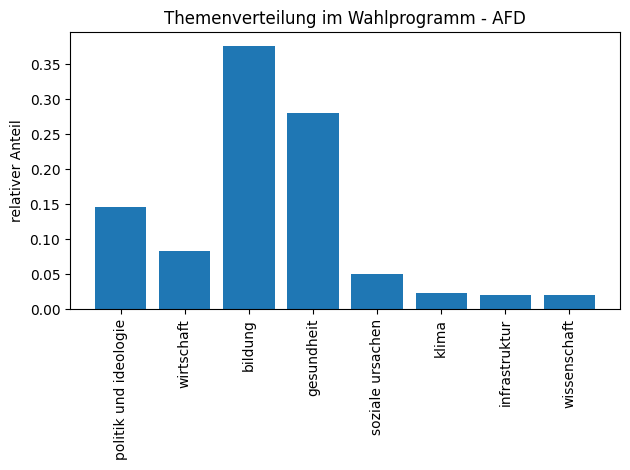

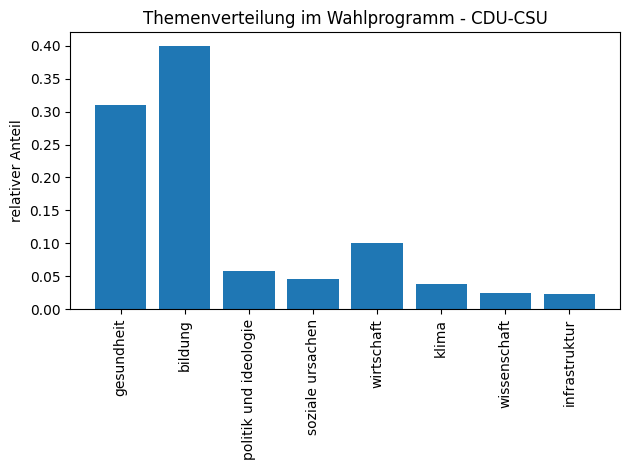

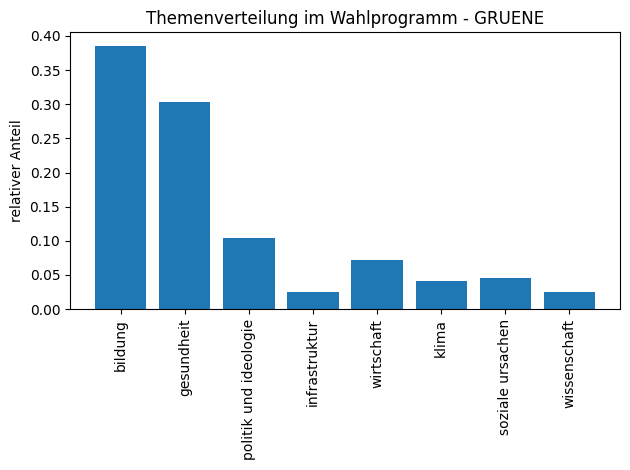

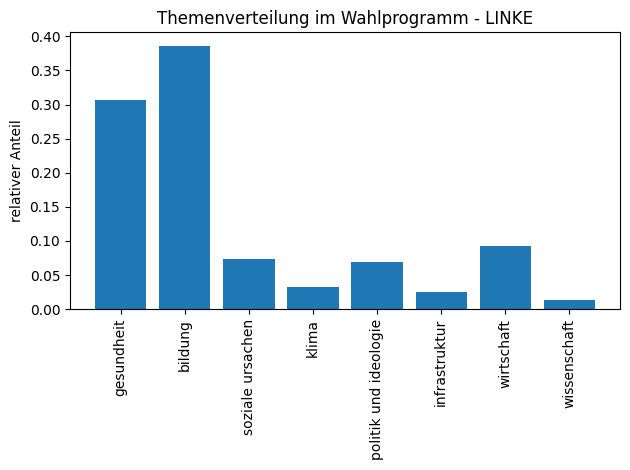

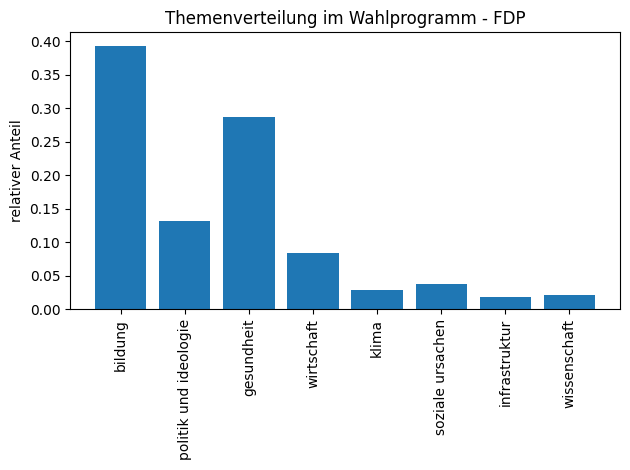

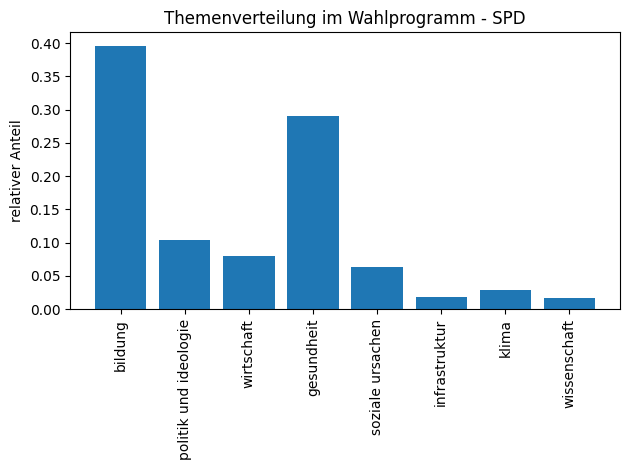

In [ ]:
for i in range(len(topicdflist)):
    getthemdistrplot(topicdflist[i],partrf[i])

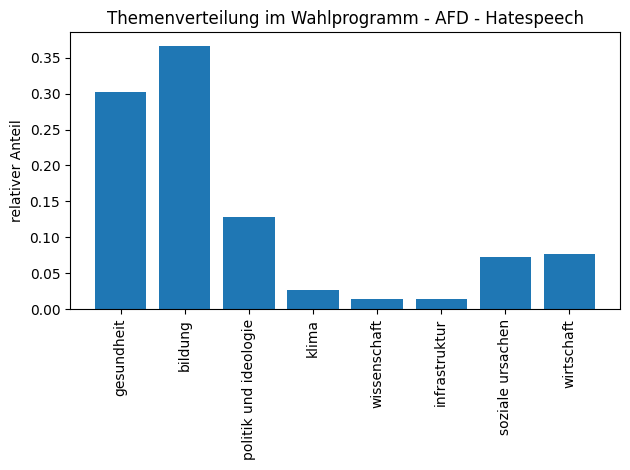

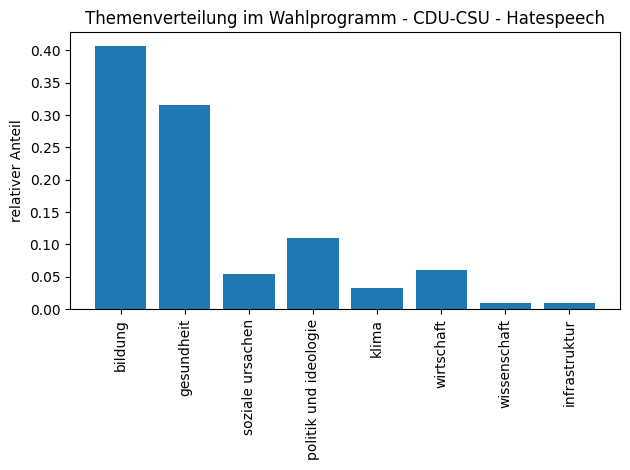

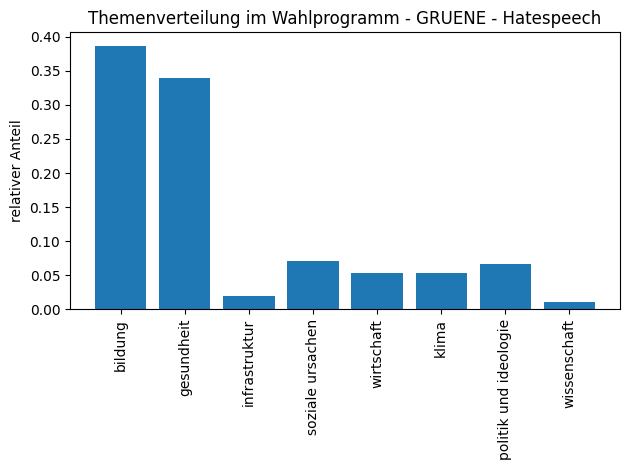

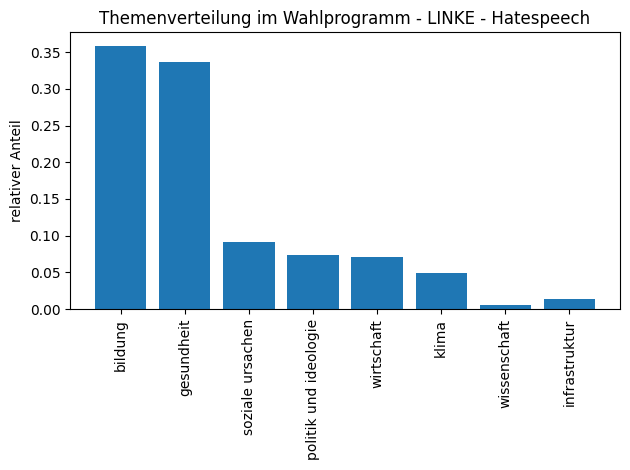

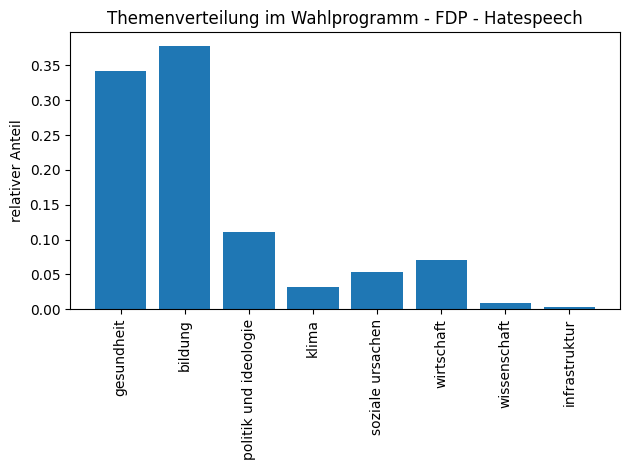

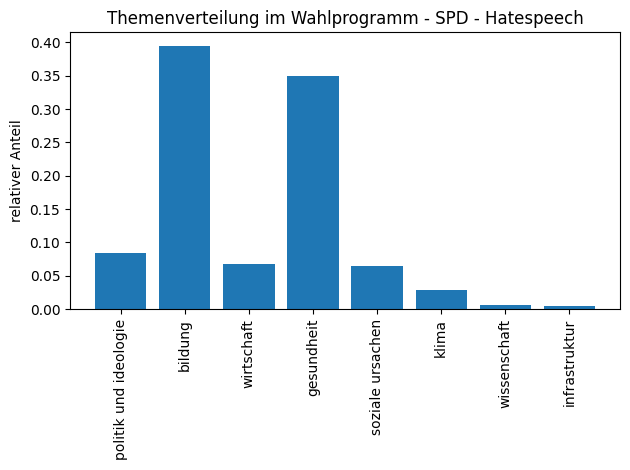

In [ ]:
for i in range(len(topichatedflist)):
    getthemdistrplot(gethatethemedistrdf(topichatedflist[i]), partrf[i]+" - Hatespeech")

In [ ]:
def getcombplot_hatetopicdistr(inputdfallg,inputdfneg,partbez):
    themrf=['politik und ideologie', 'wirtschaft', 'bildung', 'gesundheit', 'soziale ursachen', 'klima', 'infrastruktur', 'wissenschaft']
    hdallg=getthemelist(inputdfallg)
    allgemeinpre=hdallg[1]
    labelallgemeinpre=hdallg[0]
    hdneg=getthemelist(inputdfneg)
    negativpre=hdneg[1]
    labelnegativpre=hdneg[0]
    #sortierung von dem ersten datensatz
    allgemein=[]
    for i in themrf:
        allgemein+=[round(allgemeinpre[labelallgemeinpre.index(i)],2)]

    #sortierung von dem zweiten datensatz
    negativ=[]
    for i in themrf:
        negativ+=[round(negativpre[labelnegativpre.index(i)], 2)]
    
    x=np.arange(len(themrf))
    width=0.48 #width of bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, allgemein, width, label='Allgemein')
    rects2 = ax.bar(x + width/2, negativ, width, label='Hatespeech')
    ax.set_ylabel('Relative Menge')
    ax.set_title('Vergleich der Themenverteilung Allgemein und in Hatespeech - relativ - '+ partbez, pad=20)
    ax.set_xticks(x, themrf, rotation=90)
    ax.legend()
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.set_ylim([0, 0.45])
    fig.tight_layout()
    plt.show()

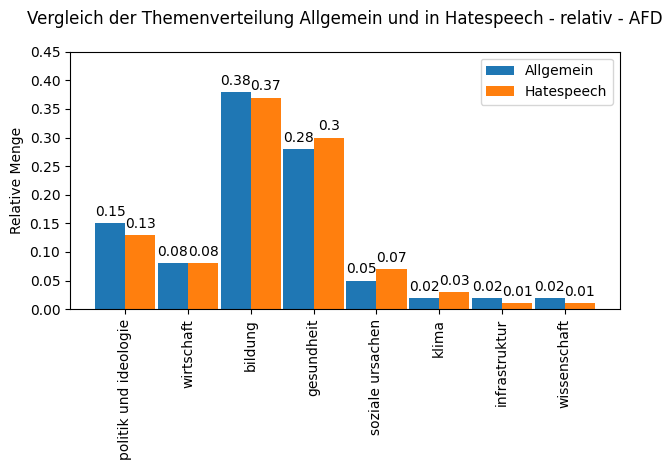

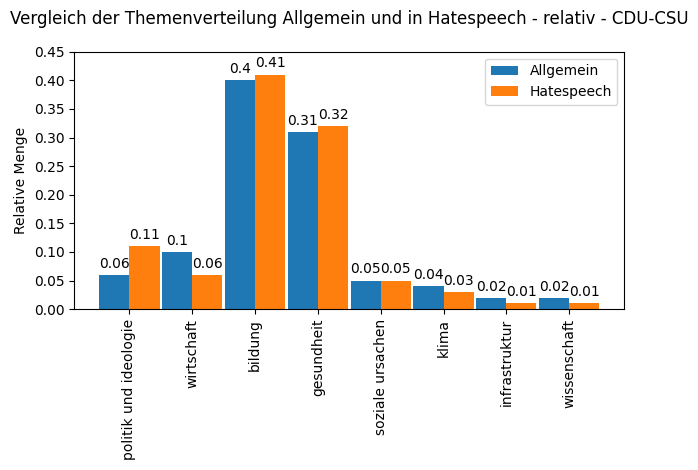

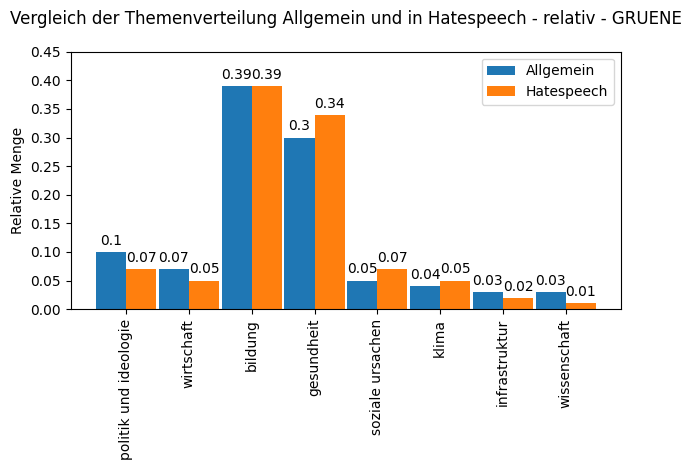

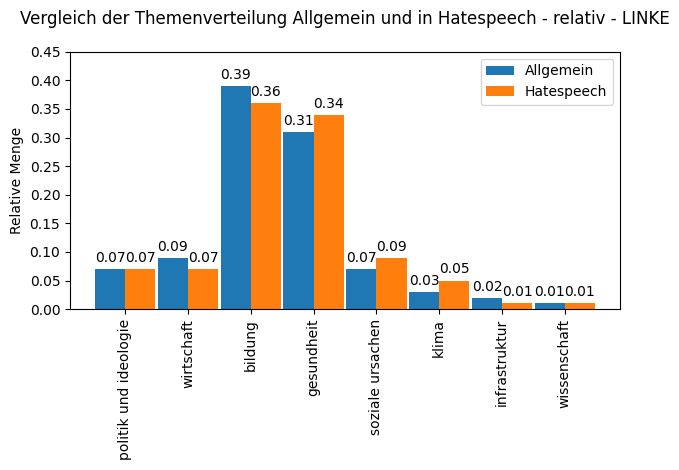

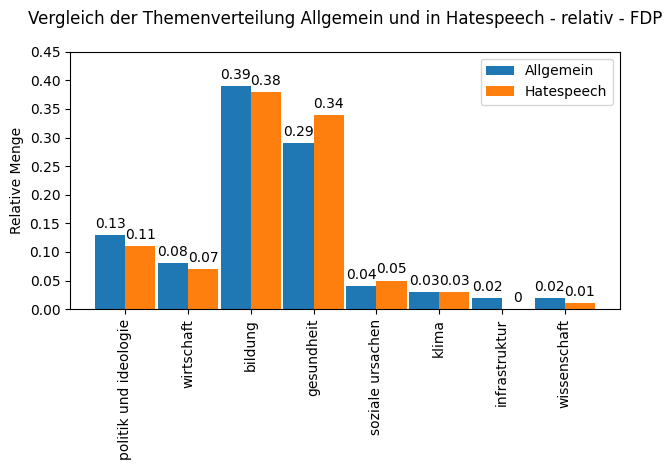

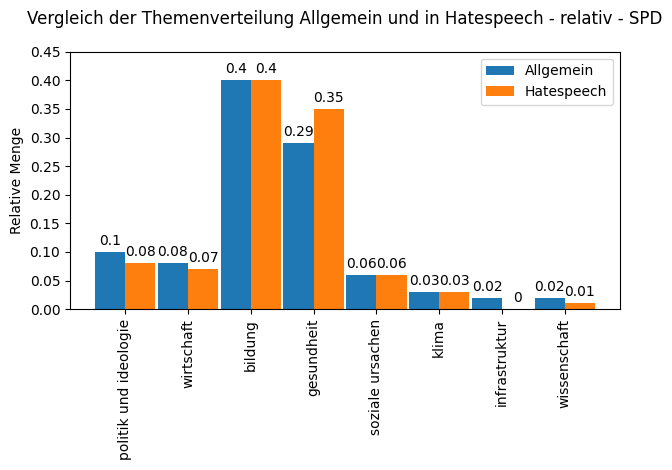

In [ ]:
for i in range(len(topicdflist)):
    getcombplot_hatetopicdistr(topicdflist[i],gethatethemedistrdf(topichatedflist[i]) ,partrf[i])